### KLASYFIKACJA EMOCJI Z WYKORZYSTANIEM GŁĘBOKIEJ SIECI NEURONOWEJ 'RESNET50'

#### Generalny schemat procesu klasyfikacji obrazów z wykorzystaniem sieci neuronowych:

1. Gromadzenie danych.
2. Etykietowanie zbioru danych.
3. Odpowiednie transformacje zbioru danych ( kwestie dostosowywania wielkości obrazów, augmentacja danych itd. ).
4. Budowa modelu sieci neuronowej.
5. Budowa architektury umożliwiającej optymalny sposób trenowania sieci neuronowej.
6. Trenowanie modelu na bazie treningowej części zbioru danych.
7. Ewaluacja modelu na bazie walidacyjnej części zbioru danych.
8. Wykorzystanie modelu w praktyce / generowanie predykcji.


#### Architektura sieci ResNet

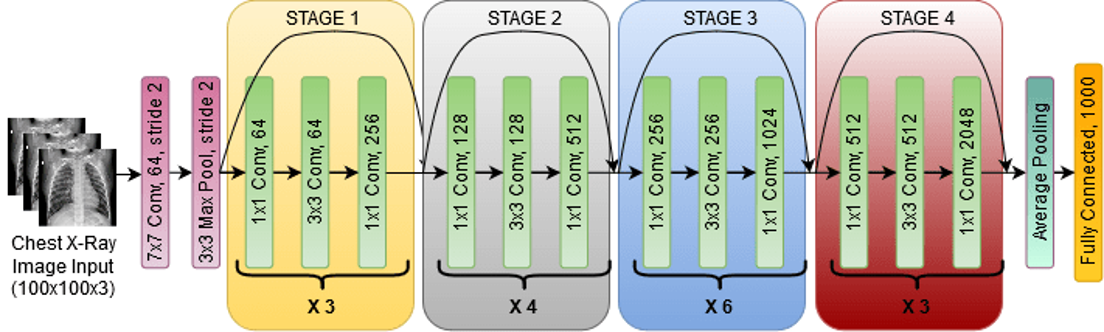



Sieć ResNet - podobnie jak inne architektury sieci neuronowych, których celem jest przetwarzanie obrazów / filmów - bazuje na procesach konwolucji. Cechą charakterystyczną sieci ResNet jest fakt, że składa się ona z określonej liczby bloków, pomiędzy którymi zachodzą połączenia 'skip connections'. Taka budowa umożliwia rozwiązywanie szeregu problemów - przede wszystkim problemu 'degradacji' ( im sieć jest głębsza, tym jej wydajność spada ).

Projekt wykonano z wykorzystaniem zbioru około 30.000 zdjęć i obrazów  reprezentujących ekspresję emocji. Zbiór danych nazywa się 'FER-2013'; zaimportowano go ze strony 'kaggle.com'.

#### Projekt wykonano w języku programowania 'Python'; przede wszystkim przy użyciu framework'u "Pytorch".
#### Projekt składa się z 7 plików z kodem:
- 'Dataset', w któym zachodzi proces preprocessingu oraz odpowiednich transformacji zbioru danych,
- 'Model', który stanowi plik z modelem sieci neuronowej,
- 'Model_dropout', który stanowi plik z modelem sieci neuronowej po dodaniu do niej warstw regularyzacyjnych "dropout" ( które dodano w ramach procesu optymalizacji modelu sieci neuronowej ),
- 'Training_Loop', który stanowi plik ze schematem trenowania oraz ewaluacji sieci neuronowej,
- 'TrainNN', który jest jednym z 2 plików do uruchomienia bezpośredniego ( obok obecnie wykorzystywanego ). Odbywa się w nim proces trenowania sieci neuronowej bazujący na zaimportowanych funkcjach z pozostałych plików ( zauważyłem, że sieć lepiej trenuje się przy uruchomieniu z pliku w formacie 'py' w porównaniu do pliku "notatnikowego" ),
- 'Predict', który stanowi plik z funkcjami umożliwiającymi predykcję obrazów,
- obecnie wykorzystywany plik 'Classification_notebook', którego dalszą część stanowi zaimportowana funkcja z pliku 'Predict'. Plik umożliwia dokonywanie oraz wizualizację predykcji zdjęć / obrazów w formacie '.jpg'.

#### Projekt składa się także z następujących plików:
- wytrenowanego modelu sieci neuronowej "ResNet50_dropout_end_score.pt" ( który to plik zachowuje wartości zoptymalizowanych parametrów ) znajdującego się w folderze 'Trained_Classification_Models',
- wizualizacji kształtowania się funkcji straty oraz funkcji reprezentującej precyzję predykcji na różnym etapie,
- przykładowych zdjęć do predykcji znajdujących się w folderze 'Photos_to_predict'.

Jako że proces trenowania sieci neuronowej zajmuje około dwóch dni, sieć nie została zoptymalizowana w sposób optymalny ( ze względu na mój ograniczony czas ). Załączone zostały natomiast 3 wykresy kształtowania się funkcji straty oraz 3 wykresy kształtowania się precyzji predykcji na różnych etapach. Załączono je w folderze 'Charts'.
- charts_1 ( wstępna wersja )
- charts_4 ( wersja po zoptymalizowaniu wartości tempa trenowania; wyraźnie widać dużą skalę przetrenowania modelu )
- charts_final ( wersja wytrenowana na bazie modelu z pliku "Model_dropout", gdzie do sieci 'ResNet50' dodano warstwę regularyzacyjną 'dropout' po każdej funkcji aktywacji )

Folder 'dataset_1' jest docelowym plikiem ze zbiorem danych; plik jest pusty ( zbiór danych można zaimportować w razie konieczności )

#### Poniżej znajduje się kod umożliwiający generowanie predykcji.

In [1]:
import torch
from Predict import predict

In [2]:
folder_path = "Trained_Classification_Models"

# 'path' = ścieżka do modelu
def load_model(path):
    return torch.load(path)

# konieczne jest podanie własnej ścieżki do wytrenowanego modelu
model = load_model(folder_path + "/ResNet50_dropout_end_score.pt")

# print(model.parameters)

In [18]:
path_1 = r'Photos_to_predict\1000_F_132680318_JjauhPMSZDmyxPcblXXRv4l8Ml1juld4' + '.jpg'


classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# 'put_text' = funkcja wizualizująca predykcję na zdjęciu
# 'path_1' = ścieżka do zdjęcia
predict(path_1, model, classes, print_text=True, put_text=True) 

### Wnioski:
- Sieć neuronowa lepiej klasyfikuje przykładowe, testowe obrazy z 'google grafiki' w wersji z warstwą regularyzacyjną 'dropout' pomimo tego, że rezultaty ewaluacji wskazują na bardzo podobne wyniki precyzji predykcji dla wstępnej wersji modelu sieci neuronowej ( bez warstwy regularyzacyjnej ).
- Sieć neuronowa względnie dobrze radzi sobie ze zdjęciami testowymi z wyraźną gestyklulacją / pozą - jakość klasyfikacji na bazie samego wyrazu twarzy wygląda gorzej ( co też wynika ze specyfikacji samego treningowego zbioru danych ).
- Udało się osiągnąć precyzję predykcji oscylującą w granicach 60% na zbiorze walidacyjnym ( startując z początkowych 14% ).
- Lepsze - do pewnego stopnia - rezultaty osiągnąć można byłoby zmieniając parametry dla warstwy regularyzacyjnej, optymalizatora itd.
- Faktycznie znacznie lepsze rezultaty można byłoby osiągnąć po zastosowaniu zaawansowanej techniki augmentacji danych; przykładowo, przy użyciu generatywnej sieci neuronowej ( GAN ).
- Można byłoby pomyśleć o wyborze bardziej optymalnego zbioru danych i wyternowaniu sieci neuronowej na bazie już opracowanej architektury; 'FER-2013' ma pewne mankamenty.